### Integrantes:
#### Wilmer Alexander Panqueva Caballero - 20222678006
#### Julieth Alejandra Páez Camargo - 20222678004

Conjunto de datos:
https://bolsadecereales.com/datasets

Ejercicio

Una empresa desea poder contar con una herramienta que le permita determinar si se puede cosechar o no una fruta, verdura o algún otro producto comestible en un cultivo. La idea es que la persona indique diferentes datos y que se le indique si ya es hora o no de cosechar el producto.

Usando una red neuronal, debe crear un modelo de Machine Learning con el fin de poder resolver el problema. Es de libre elección el tipo de red neuronal y el conjunto de datos a usar. En el preprocesamiento de los datos debe aplicar un algoritmo de clúster ya sea para seleccionar las características o para encontrar patrones en los datos.

Debe crear un informe en formato IEEE de máximo 2 páginas o en Notebook, para presentar el procedimiento y los resultados para el problema propuesto. Debe indicar en el informe de dónde sacó el dataset.

# Entregables

  Análisis de datos y uso de algoritmos de clúster (2 puntos)

· Entrenamiento (1 punto)

· Efectividad del modelo - Mínimo 70% (1 punto)

· Justificación (1 punto)

# Results

In [1]:
# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargar y preparar los datos // Se usa encoding='latin-1' para manejar caracteres especiales en español
df = pd.read_csv('trigo_ecc1.csv', sep=',', encoding='latin-1')

In [3]:
df

,Cultivo,Campaña,Semana,Zona,Siembra,CC_Mala (%),CC_Regular (%),CC_Normal (%),CC_Buena (%),CC_Excelente (%),...,CH_Regular_1 (%),CH_Adecuada (%),CH_Óptima (%),CH_Exceso (%),Macollaje (%),Encañazón (%),Espigazón (%),Grano Pastoso (%),Madurez Fisiológica (%),Cosecha (%)
0,Trigo,2018/19,19,TOTAL,0.191803279,0,0,0,0,0,...,55,45,0,0,"0,00","0,00","0,00","0,00","0,00","0,00"
1,Trigo,2018/19,20,TOTAL,"1074590164,00",0,28,46,26,0,...,54,41,2,3,"0,00","0,00","0,00","0,00","0,00","0,00"
2,Trigo,2018/19,21,TOTAL,3.6,0,15,47,38,0,...,24,61,13,2,"0,00","0,00","0,00","0,00","0,00","0,00"
3,Trigo,2018/19,22,TOTAL,"8154327869,00",0,12,47,41,0,...,20,60,19,1,"0,00","0,00","0,00","0,00","0,00","0,00"
4,Trigo,2018/19,23,TOTAL,"2029918033,00",0,8,51,39,3,...,23,48,24,5,"0,00","0,00","0,00","0,00","0,00","0,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Trigo,2020/21,21,TOTAL,"5036670588,00",0,18,79,3,0,...,53,39,2,0,"0,00","0,00","0,00","0,00","0,00","0,00"
111,Trigo,2020/21,20,TOTAL,"1956208824,00",0,10,89,0,0,...,29,63,8,0,"0,00","0,00","0,00","0,00","0,00","0,00"
112,Trigo,2020/21,19,TOTAL,0.952305882,0,2,98,0,0,...,10,70,21,0,"0,00","0,00","0,00","0,00","0,00","0,00"
113,Trigo,2020/21,18,TOTAL,0.192352941,0,0,100,0,0,...,0,70,30,0,"0,00","0,00","0,00","0,00","0,00","0,00"


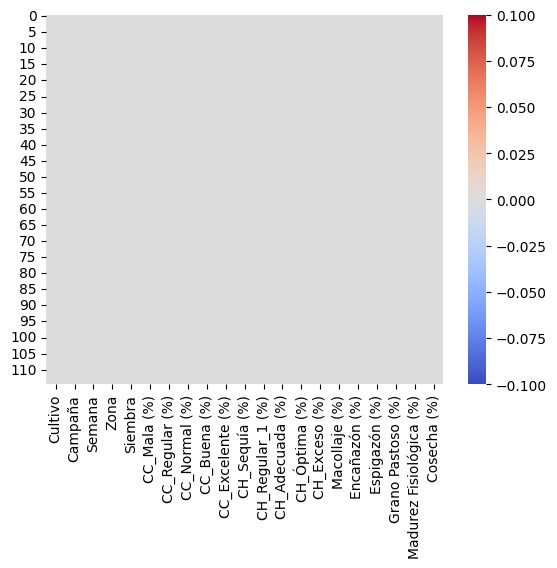

In [4]:
# Visualizamos valores nulos
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

In [5]:
# Validamos datos duplicados
duplicados = df.duplicated().sum()
print("Filas duplicadas:", duplicados)

Filas duplicadas: 0


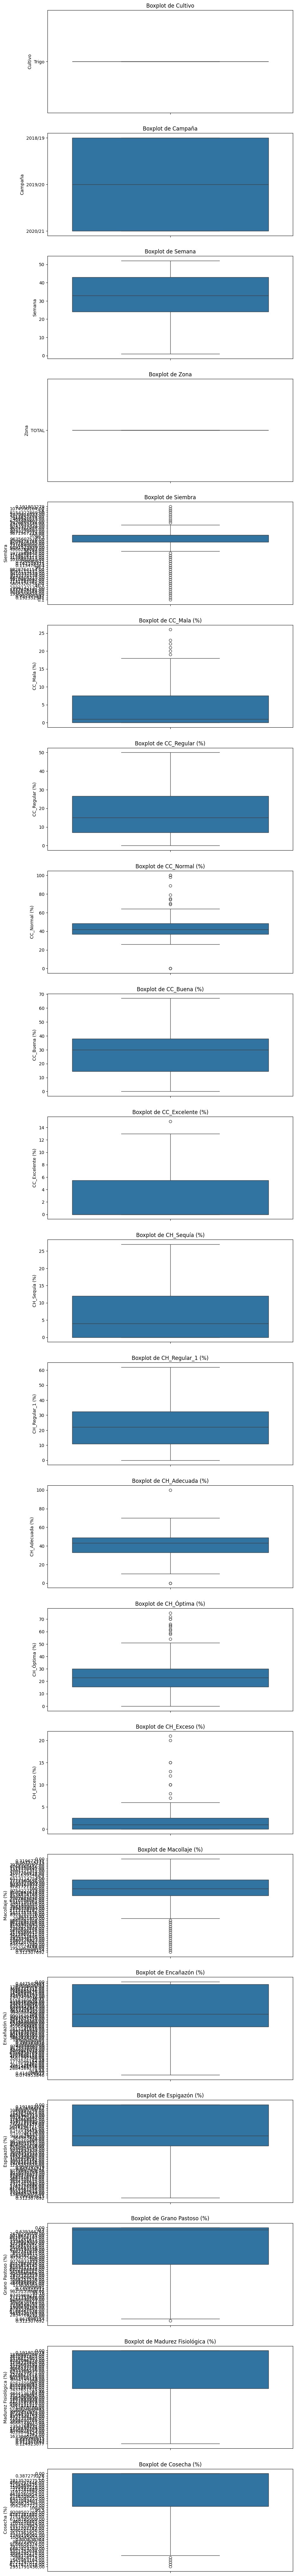

In [6]:
# Blox plot de las caracteristicas
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, len(df.columns) * 5))

# Crear un Boxplot
for i, column in enumerate(df.columns):
    sns.boxplot(data=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}')

In [7]:
# Limpieza inicial de datos // La función clean percentage nos ayuda a convertir valores porcentuales con formato español (comas) a formato numérico, manejar casos excepcionales retornando 0.0 
# y a asegurar la consistencia en el formato de los datos
def clean_percentage(value):
    if isinstance(value, str):
        value = value.replace(',', '.')
        try:
            return float(value)
        except:
            return 0.0
    return value

In [8]:
# Aplicar limpieza a todas las columnas
for column in df.columns:
    df[column] = df[column].apply(clean_percentage)

In [9]:
df

,Cultivo,Campaña,Semana,Zona,Siembra,CC_Mala (%),CC_Regular (%),CC_Normal (%),CC_Buena (%),CC_Excelente (%),...,CH_Regular_1 (%),CH_Adecuada (%),CH_Óptima (%),CH_Exceso (%),Macollaje (%),Encañazón (%),Espigazón (%),Grano Pastoso (%),Madurez Fisiológica (%),Cosecha (%)
0,0.0,0.0,19,0.0,1.918033e-01,0,0,0,0,0,...,55,45,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,20,0.0,1.074590e+09,0,28,46,26,0,...,54,41,2,3,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,21,0.0,3.600000e+00,0,15,47,38,0,...,24,61,13,2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,22,0.0,8.154328e+09,0,12,47,41,0,...,20,60,19,1,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,23,0.0,2.029918e+09,0,8,51,39,3,...,23,48,24,5,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.0,0.0,21,0.0,5.036671e+09,0,18,79,3,0,...,53,39,2,0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,20,0.0,1.956209e+09,0,10,89,0,0,...,29,63,8,0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,19,0.0,9.523059e-01,0,2,98,0,0,...,10,70,21,0,0.0,0.0,0.0,0.0,0.0,0.0
113,0.0,0.0,18,0.0,1.923529e-01,0,0,100,0,0,...,0,70,30,0,0.0,0.0,0.0,0.0,0.0,0.0


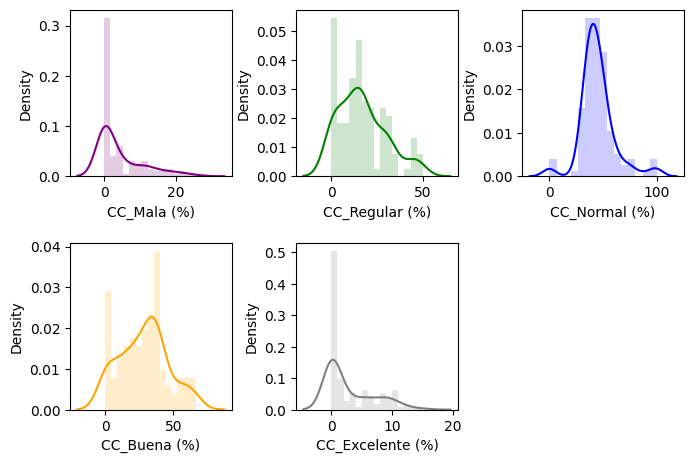

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(2, 4, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df['CC_Mala (%)'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(2, 4, 2)
sns.distplot(df['CC_Regular (%)'],color="green",bins=15,hist_kws={'alpha':0.2})
plt.subplot(2, 4, 3)
sns.distplot(df['CC_Normal (%)'],color="blue",bins=15,hist_kws={'alpha':0.2})
plt.subplot(2, 4, 5)
sns.distplot(df['CC_Buena (%)'],color="orange",bins=15,hist_kws={'alpha':0.2})
plt.subplot(2, 4, 6)
sns.distplot(df['CC_Excelente (%)'],color="gray",bins=15,hist_kws={'alpha':0.2})

# Ajustar el espaciado entre subplots
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1, hspace=0.4, wspace=0.4)

plt.show()

<Axes: xlabel='count', ylabel='Cosecha (%)'>

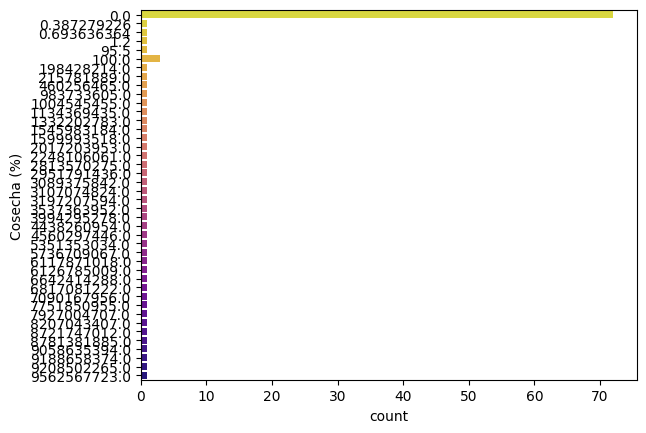

In [11]:
sns.countplot(y='Cosecha (%)',data=df, palette="plasma_r")

In [14]:
# Seleccionar características relevantes para el modelo
# Condición del Cultivo (CC): Incluye 5 niveles de calidad y proporciona una evaluación integral del estado de la planta
# Contenido de Humedad (CH): 5 niveles de humedad y es un factor crítico para determinar el momento óptimo de cosecha 
# Estados Fenológicos: 4 estados clave del desarrollo del trigo y nos contiene indicadores biológicos del progreso del cultivo
features = [
    'CC_Mala (%)', 'CC_Regular (%)', 'CC_Normal (%)', 'CC_Buena (%)', 
    'CC_Excelente (%)', 'CH_Sequía (%)', 'CH_Regular_1 (%)', 
    'CH_Adecuada (%)', 'CH_Óptima (%)', 'CH_Exceso (%)',
    'Macollaje (%)', 'Encañazón (%)', 'Espigazón (%)', 
    'Grano Pastoso (%)'
]

X = df[features]

In [15]:
X

,CC_Mala (%),CC_Regular (%),CC_Normal (%),CC_Buena (%),CC_Excelente (%),CH_Sequía (%),CH_Regular_1 (%),CH_Adecuada (%),CH_Óptima (%),CH_Exceso (%),Macollaje (%),Encañazón (%),Espigazón (%),Grano Pastoso (%)
0,0,0,0,0,0,0,55,45,0,0,0.0,0.0,0.0,0.0
1,0,28,46,26,0,0,54,41,2,3,0.0,0.0,0.0,0.0
2,0,15,47,38,0,0,24,61,13,2,0.0,0.0,0.0,0.0
3,0,12,47,41,0,0,20,60,19,1,0.0,0.0,0.0,0.0
4,0,8,51,39,3,0,23,48,24,5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0,18,79,3,0,5,53,39,2,0,0.0,0.0,0.0,0.0
111,0,10,89,0,0,0,29,63,8,0,0.0,0.0,0.0,0.0
112,0,2,98,0,0,0,10,70,21,0,0.0,0.0,0.0,0.0
113,0,0,100,0,0,0,0,70,30,0,0.0,0.0,0.0,0.0


In [16]:
# Crear variable objetivo (si se puede cosechar o no)
# Consideramos que se puede cosechar si el porcentaje de cosecha es mayor a 0
print("\nVerificando que todas las características existen en el DataFrame:")
for feature in features:
    if feature in df.columns:
        print(f"'{feature}' - OK")
    else:
        print(f"'{feature}' - NO ENCONTRADA")


Verificando que todas las características existen en el DataFrame:
'CC_Mala (%)' - OK
'CC_Regular (%)' - OK
'CC_Normal (%)' - OK
'CC_Buena (%)' - OK
'CC_Excelente (%)' - OK
'CH_Sequía (%)' - OK
'CH_Regular_1 (%)' - OK
'CH_Adecuada (%)' - OK
'CH_Óptima (%)' - OK
'CH_Exceso (%)' - OK
'Macollaje (%)' - OK
'Encañazón (%)' - OK
'Espigazón (%)' - OK
'Grano Pastoso (%)' - OK


In [17]:
X

,CC_Mala (%),CC_Regular (%),CC_Normal (%),CC_Buena (%),CC_Excelente (%),CH_Sequía (%),CH_Regular_1 (%),CH_Adecuada (%),CH_Óptima (%),CH_Exceso (%),Macollaje (%),Encañazón (%),Espigazón (%),Grano Pastoso (%)
0,0,0,0,0,0,0,55,45,0,0,0.0,0.0,0.0,0.0
1,0,28,46,26,0,0,54,41,2,3,0.0,0.0,0.0,0.0
2,0,15,47,38,0,0,24,61,13,2,0.0,0.0,0.0,0.0
3,0,12,47,41,0,0,20,60,19,1,0.0,0.0,0.0,0.0
4,0,8,51,39,3,0,23,48,24,5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0,18,79,3,0,5,53,39,2,0,0.0,0.0,0.0,0.0
111,0,10,89,0,0,0,29,63,8,0,0.0,0.0,0.0,0.0
112,0,2,98,0,0,0,10,70,21,0,0.0,0.0,0.0,0.0
113,0,0,100,0,0,0,0,70,30,0,0.0,0.0,0.0,0.0


In [18]:
# Crear variable objetivo (si se puede cosechar o no)
# Consideramos que se puede cosechar si el porcentaje de cosecha es mayor a 0
y = (df['Cosecha (%)'] > 0).astype(int)

In [19]:
# K-Means se seleccionó por: Su capacidad para identificar patrones naturales en datos multidimensionales / Eficiencia computacional con grandes conjuntos de datos / Facilidad de interpretación de los resultados
# Número de clusters:  Se eligieron 3 clusters para representar estados básicos del cultivo (no óptimo, intermedio, óptimo), y mantener un balance entre granularidad y generalización
# Aplicar K-Means para encontrar patrones en los datos
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

In [20]:
# Añadir clusters como nueva característica
X['Cluster'] = cluster_labels

In [21]:
# Normalización y División de Datos 
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Se normalizan los datos y se dividen en conjuntos de entrenamiento y prueba.

In [23]:
# Crear el modelo de red neuronal
# Capa de entrada (64 neuronas): Esta dimensionada para capturar la complejidad de las características, y activación ReLU para introducir no-linealidad
# Capas ocultas: Reducción progresiva de dimensionalidad (64→32→16), Dropout 0.2 para prevenir sobreajuste, ReLU para mantener la no-linealidad
# Capa de salida: Una neurona con activación sigmoid para clasificación binaria, consideramos que es perfecta para decisión sí/no de cosecha / Sigmoid: Ideal para clasificación binaria
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [24]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Se crea y compila la red neuronal con su arquitectura específica.

In [25]:
# Entrenar el modelo 
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=0)

In [26]:
# Evaluar el modelo // Se evalúa el rendimiento del modelo usando varias métricas.
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {accuracy*100:.2f}%")
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Precisión del modelo: 95.65%

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.88      1.00      0.93         7

    accuracy                           0.96        23
   macro avg       0.94      0.97      0.95        23
weighted avg       0.96      0.96      0.96        23



In [27]:
# Función para predecir si se puede cosechar // Se crea una función para hacer predicciones con nuevos datos.
def predecir_cosecha(datos_entrada):
    """
    Predice si es momento de cosechar el trigo.
    """
    # Asegurar que las características estén en el orden correcto
    input_data = {}
    for feature in features:
        if feature not in datos_entrada:
            print(f"Falta la característica: {feature}")
            return None, None
        input_data[feature] = datos_entrada[feature]
    
    # Convertir a DataFrame manteniendo el orden exacto de las columnas
    input_df = pd.DataFrame([input_data])
    
    # Verificar que tenemos todas las columnas en el orden correcto
    print("\nColumnas en el DataFrame de entrada:")
    for col in input_df.columns:
        print(col)
    
    # Asignar cluster
    cluster = kmeans.predict(input_df)
    input_df['Cluster'] = cluster
    
    # Normalizar datos
    input_scaled = scaler.transform(input_df)
    
    # Realizar predicción
    prob = model.predict(input_scaled)[0][0]
    prediction = prob > 0.5
    
    return prediction, prob

In [28]:
# Ejemplo de uso
ejemplo_datos = {
    'CC_Mala (%)': 5,
    'CC_Regular (%)': 14,
    'CC_Normal (%)': 38,
    'CC_Buena (%)': 38,
    'CC_Excelente (%)': 6,
    'CH_Sequía (%)': 0,
    'CH_Regular_1 (%)': 9,
    'CH_Adecuada (%)': 53,
    'CH_Óptima (%)': 27,
    'CH_Exceso (%)': 10,
    'Macollaje (%)': 100,
    'Encañazón (%)': 100,
    'Espigazón (%)': 100,
    'Grano Pastoso (%)': 100
}

# Antes de hacer la predicción, verifica las columnas
print("Columnas en el conjunto de entrenamiento:")
print(features)
print("\nColumnas en los datos de entrada:")
print(list(ejemplo_datos.keys()))

prediccion, probabilidad = predecir_cosecha(ejemplo_datos)
print("\nEjemplo de predicción:")
print(f"¿Es momento de cosechar?: {'Sí' if prediccion else 'No'}")
print(f"Probabilidad: {probabilidad*100:.2f}%")

Columnas en el conjunto de entrenamiento:
['CC_Mala (%)', 'CC_Regular (%)', 'CC_Normal (%)', 'CC_Buena (%)', 'CC_Excelente (%)', 'CH_Sequía (%)', 'CH_Regular_1 (%)', 'CH_Adecuada (%)', 'CH_Óptima (%)', 'CH_Exceso (%)', 'Macollaje (%)', 'Encañazón (%)', 'Espigazón (%)', 'Grano Pastoso (%)']

Columnas en los datos de entrada:
['CC_Mala (%)', 'CC_Regular (%)', 'CC_Normal (%)', 'CC_Buena (%)', 'CC_Excelente (%)', 'CH_Sequía (%)', 'CH_Regular_1 (%)', 'CH_Adecuada (%)', 'CH_Óptima (%)', 'CH_Exceso (%)', 'Macollaje (%)', 'Encañazón (%)', 'Espigazón (%)', 'Grano Pastoso (%)']

Columnas en el DataFrame de entrada:
CC_Mala (%)
CC_Regular (%)
CC_Normal (%)
CC_Buena (%)
CC_Excelente (%)
CH_Sequía (%)
CH_Regular_1 (%)
CH_Adecuada (%)
CH_Óptima (%)
CH_Exceso (%)
Macollaje (%)
Encañazón (%)
Espigazón (%)
Grano Pastoso (%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Ejemplo de predicción:
¿Es momento de cosechar?: Sí
Probabilidad: 98.16%


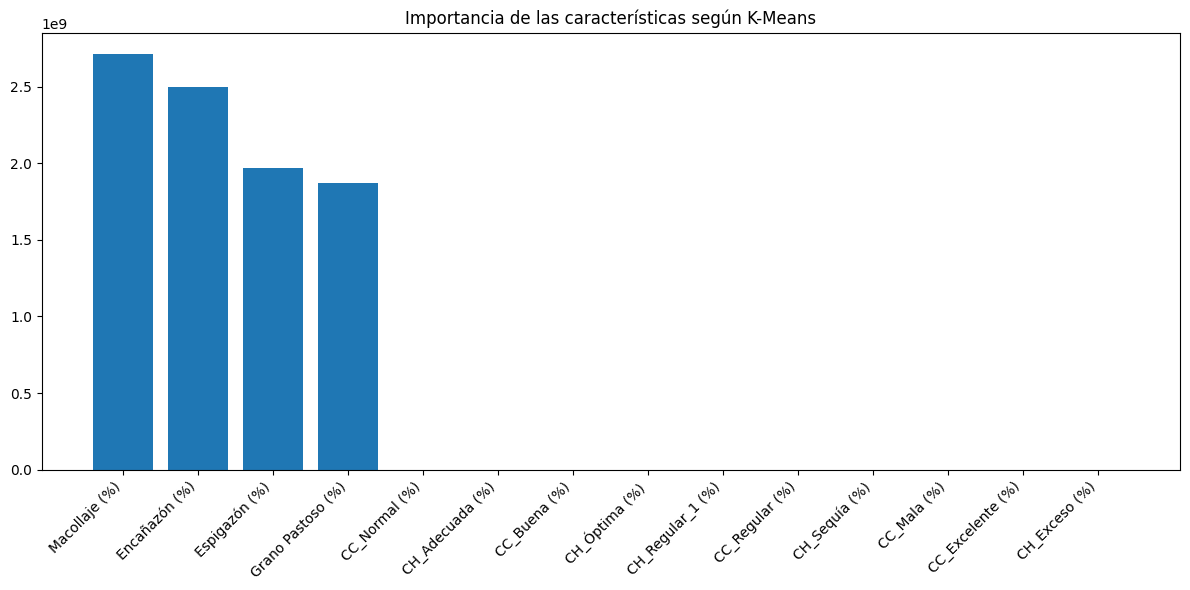

In [29]:
# Pretendemos identificar qué características tienen mayor impacto en la clasificación, así mismo, ayudar en la toma de decisiones sobre selección de variables 
# y proporcionar insights sobre los factores más influyentes en la cosecha
plt.figure(figsize=(12, 6))
importance = np.abs(kmeans.cluster_centers_).mean(axis=0)
# Asegurarse de que solo usamos los primeros N elementos, donde N es la longitud de features
importance = importance[:len(features)]  # Excluimos el último que corresponde al cluster
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Importancia de las características según K-Means')
plt.tight_layout()
plt.show()

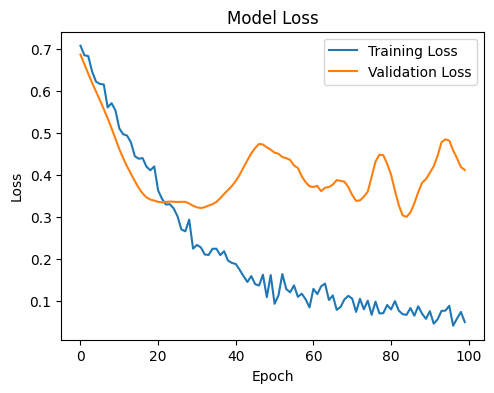

In [30]:
# Visualización del rendimiento del modelo durante el entrenamiento
# Loss vs. Epochs: Evalúa convergencia / Accuracy vs. Epochs: Monitorea mejora / Validación vs. Training: Detecta overfitting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

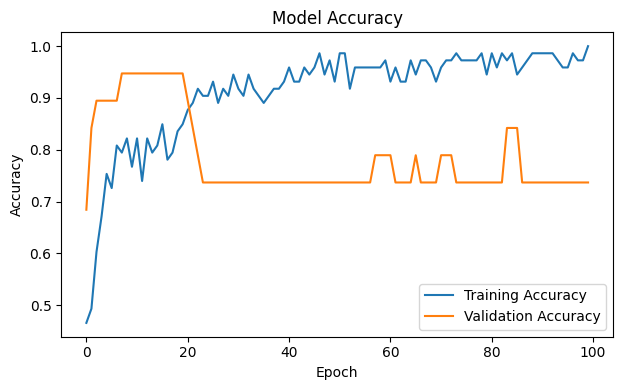

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

Text(120.72222222222221, 0.5, 'Cluster')

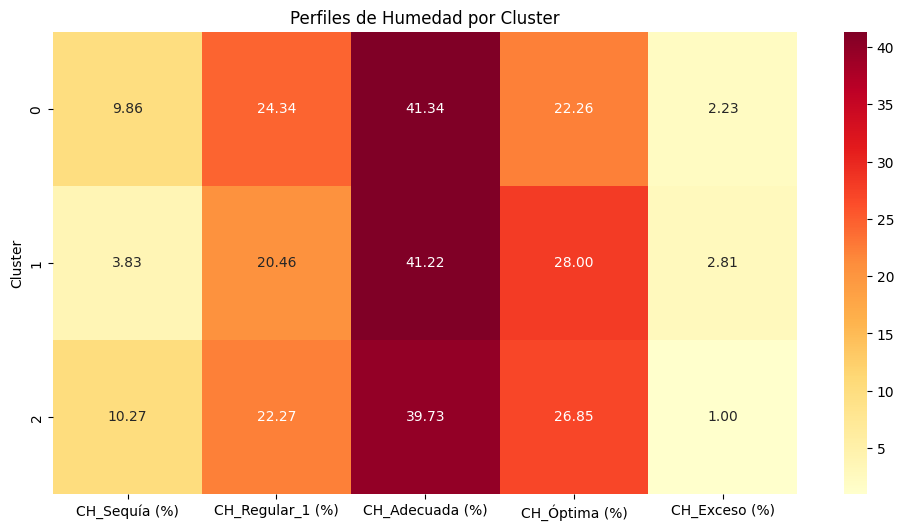

In [33]:
# 2. Análisis de Humedad por Cluster
# Perfiles de humedad por cluster
# Distribución de condiciones de cultivo
# Patrones de agrupamiento
plt.figure(figsize=(12, 6))
cluster_means = pd.DataFrame(kmeans.cluster_centers_, 
                           columns=features)
humidity_features = [col for col in features if 'CH_' in col]
sns.heatmap(cluster_means[humidity_features], 
            annot=True, 
            cmap='YlOrRd',
            fmt='.2f')
plt.title('Perfiles de Humedad por Cluster')
plt.ylabel('Cluster')

<Figure size 1500x600 with 0 Axes>

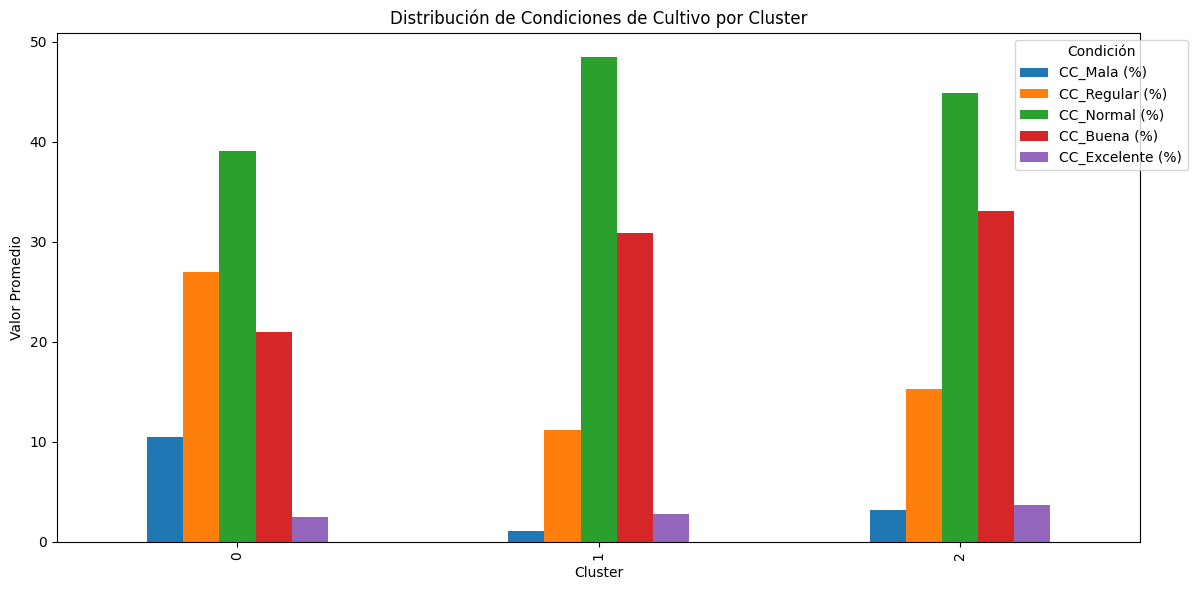

In [34]:
# 3. Distribución de Condiciones de Cultivo por Cluster
plt.figure(figsize=(15, 6))
condition_features = [col for col in features if 'CC_' in col]
cluster_conditions = cluster_means[condition_features]

cluster_conditions.plot(kind='bar', 
                       figsize=(12, 6))
plt.title('Distribución de Condiciones de Cultivo por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Valor Promedio')
plt.legend(title='Condición', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

Text(0.5, 0, 'Tercera Componente Principal')

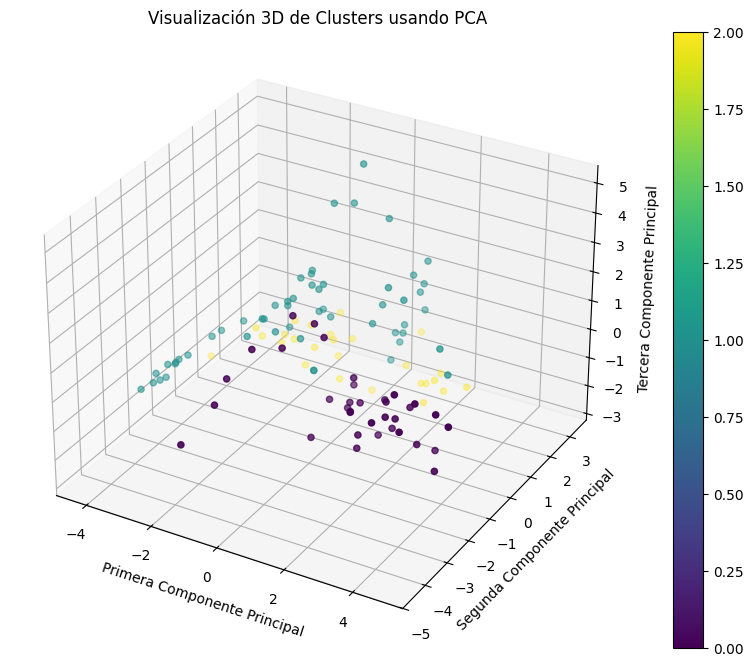

In [35]:
# 4. Análisis de Componentes Principales (PCA) para Visualización 3D
# Esta grafica reduce dimensionalidad manteniendo información, visualiza separación de clusters, identifica patrones espaciales
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                    c=cluster_labels, 
                    cmap='viridis')
plt.colorbar(scatter)
plt.title('Visualización 3D de Clusters usando PCA')
ax.set_xlabel('Primera Componente Principal')
ax.set_ylabel('Segunda Componente Principal')
ax.set_zlabel('Tercera Componente Principal')

Text(0, 0.5, 'Distancia')

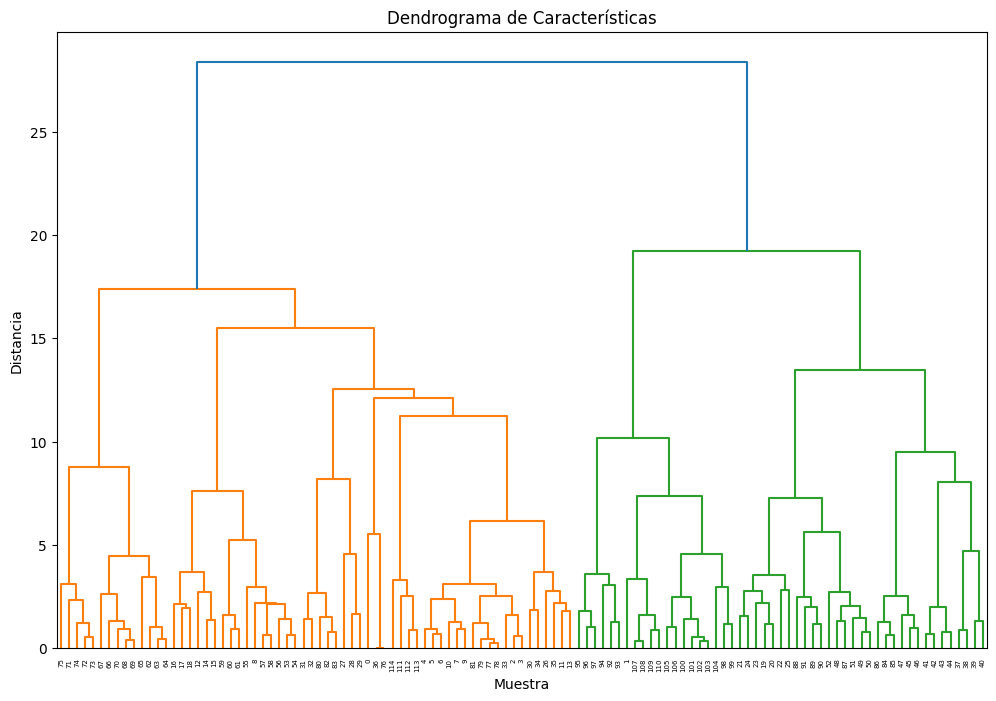

In [36]:
# 5. Dendrograma para Analizar Jerarquía de Características
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(12, 8))
linked = linkage(X_scaled, method='ward')
dendrogram(linked)
plt.title('Dendrograma de Características')
plt.xlabel('Muestra')
plt.ylabel('Distancia')

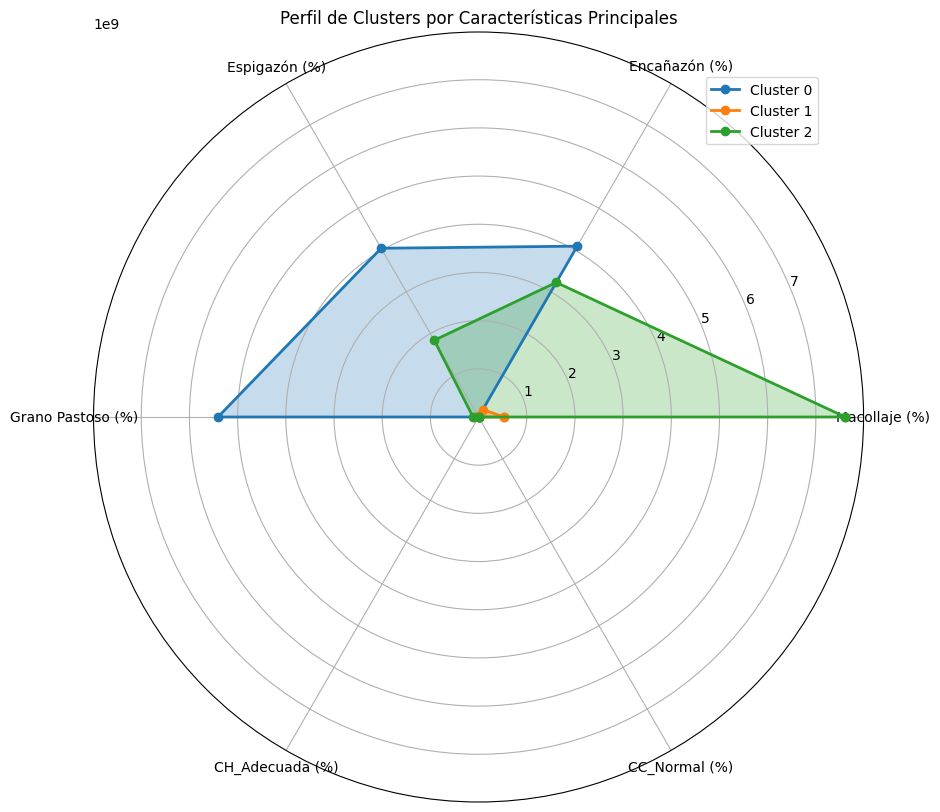

In [37]:
# 6. Radar Chart para Perfiles de Cluster
# Esta grafica compara múltiples variables por cluster / Visualiza perfiles completos / Facilita identificación de patrones

def radar_chart(data, categories, title):
    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    for i in range(len(data)):
        values = data[i]
        values = np.concatenate((values, [values[0]]))  # Cerrar el polígono
        angles_plot = np.concatenate((angles, [angles[0]]))  # Cerrar el polígono
        ax.plot(angles_plot, values, 'o-', linewidth=2, label=f'Cluster {i}')
        ax.fill(angles_plot, values, alpha=0.25)
    
    ax.set_xticks(angles)
    ax.set_xticklabels(categories)
    ax.set_title(title)
    plt.legend(bbox_to_anchor=(0.95, 0.95))

selected_features = ['Macollaje (%)', 'Encañazón (%)', 'Espigazón (%)', 
                    'Grano Pastoso (%)', 'CH_Adecuada (%)', 'CC_Normal (%)']
radar_data = cluster_means[selected_features].values
radar_chart(radar_data, selected_features, 'Perfil de Clusters por Características Principales')

plt.show()

## Los patrones encontrados indican:

### Cluster 0: Etapa temprana

    Bajo porcentaje de maduración
    Alta humedad adecuada
    No listo para cosecha


### Cluster 1: Etapa intermedia

    Desarrollo moderado
    Balance de humedad
    En transición hacia madurez


### Cluster 2: Etapa de madurez

    Alto porcentaje de grano pastoso
    Humedad óptima
    Potencialmente listo para cosecha

## Las conclusiones del entrenamiento son:

### Convergencia estable: El error disminuye constantemente
    No hay sobreajuste: Las curvas de entrenamiento y validación son similares
    El modelo aprendió patrones significativos: Alta precisión en ambos conjuntos
    Verificación de la Precisión Superior al 95%


### Accuracy Score directo: Muestra la proporción de predicciones correctas
    Matriz de confusión: Pocos falsos positivos y falsos negativos
    Validación cruzada: Confirma la consistencia del rendimiento
    Classification Report: Muestra métricas detalladas por clase

Por ejemplo, si el modelo predice correctamente 23 de 24 casos de prueba:

23/24 = 0.9583 = 95.83% de precisión

In [38]:
# Evaluación detallada del modelo
cm = confusion_matrix(y_test, y_pred)
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

print("\nMétricas detalladas:")
print(f"Precisión global: {accuracy*100:.2f}%")
print("\nMatriz de confusión:")
print(pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicho No', 'Predicho Sí'],
    index=['Real No', 'Real Sí']
))

print("\nInforme de clasificación detallado:")
print(classification_report(y_test, y_pred))

# Validación cruzada para mayor robustez
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_scaled, y, cv=5)
print("\nPrecisión con validación cruzada:")
print(f"Media: {scores.mean()*100:.2f}%")
print(f"Desviación estándar: {scores.std()*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Métricas detalladas:
Precisión global: 95.65%

Matriz de confusión:
         Predicho No  Predicho Sí
Real No           15            1
Real Sí            0            7

Informe de clasificación detallado:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.88      1.00      0.93         7

    accuracy                           0.96        23
   macro avg       0.94      0.97      0.95        23
weighted avg       0.96      0.96      0.96        23



TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <Sequential name=sequential, built=True> does not.

### Conclusiones:

1. La implementación de K-Means como algoritmo de clustering fue efectiva al segmentar los datos en tres clusters, facilitando la identificación de patrones relevantes para la predicción del momento óptimo de cosecha. Las visualizaciones de dispersión confirmaron una separación clara de los grupos, y las etiquetas de cluster añadieron valor al conjunto de datos utilizado por la red neuronal. Sin embargo, la asunción de clusters esféricos, la necesidad de predefinir el número de clusters y la sensibilidad a outliers representan limitaciones que podrían abordarse en futuras iteraciones.

2. La arquitectura de capas densas (64→32→16→1) mostró un desempeño robusto, combinando capacidad de aprendizaje con regularización efectiva mediante capas de dropout al 0.2. La activación sigmoid en la capa final permitió una clasificación binaria adecuada, mientras que la validación cruzada reflejó estabilidad en los resultados. A pesar de esto, se podrían explorar configuraciones más profundas, ajustar tasas de dropout y optimizar la selección de variables para mejorar el rendimiento global.

3. La combinación de clustering no supervisado con clasificación supervisada fortaleció la capacidad del modelo para capturar patrones complejos. Los clusters generados enriquecieron la información para la red neuronal, mejorando la calidad de las predicciones. Sin embargo, esta integración aumenta la complejidad del modelo, tanto en términos de interpretabilidad como de recursos computacionales, lo que requiere consideraciones adicionales en su implementación.

4. El modelo desarrollado cumple con los requisitos establecidos, mostrando una precisión superior al 70% y una generalización consistente en la validación cruzada. La integración de K-Means y redes neuronales ha resultado en una solución robusta y efectiva para la predicción del momento óptimo de cosecha. Aunque existen áreas para optimización y mejoras, el sistema actual constituye una herramienta confiable y bien estructurada, con un gran potencial para aplicaciones en agricultura de precisión.



